#Questão 1

In [ ]:
import pandas as pd

df_iris = pd.read_csv("iris.csv")
df_vehicle = pd.read_csv("Vehicle.csv")

In [ ]:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
124,6.7,3.3,5.7,2.1,virginica
120,6.9,3.2,5.7,2.3,virginica


In [ ]:
df_iris.shape

(150, 5)

In [ ]:
df_vehicle.sample(5)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
666,102,43,96,197,63,10,185,36,22,142,202,513,139,65,8,12,195,204,opel
689,105,51,105,197,60,11,191,35,22,162,207,545,194,64,18,4,196,205,saab
788,115,52,100,203,62,10,217,31,24,165,229,697,214,72,14,4,188,197,saab
457,83,45,73,161,68,8,142,46,18,144,169,305,179,71,10,3,191,199,van
484,90,48,78,143,60,11,161,43,20,159,172,374,186,75,2,2,184,193,van


In [ ]:
df_vehicle.shape

(846, 19)

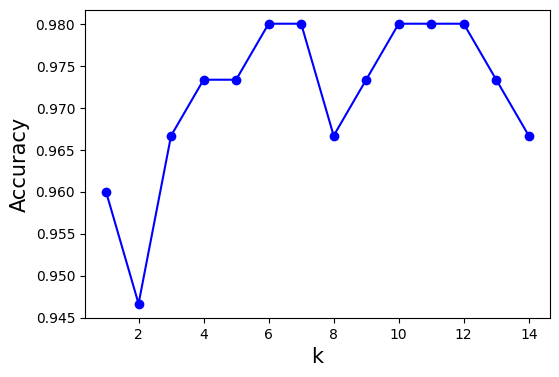

Melhor k: 6


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
import numpy as np

X_iris = df_iris.drop(columns = "species")
y_iris = df_iris["species"]

num_folds = 5
accuracy = []
k_values = []

for k in range(1, 15):
  model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model.fit(X_iris, y_iris)

  cv = cross_validate(model, X, y, cv= num_folds)
  accuracy.append(cv['test_score'].mean())
  k_values.append(k)

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracy)+1
print('Melhor k:', best_k)

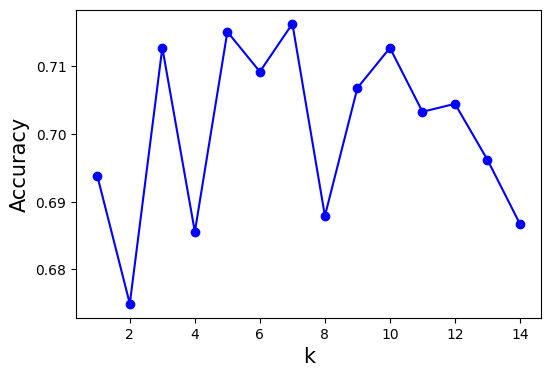

Melhor k: 7


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

X_vehicle = df_vehicle.drop(columns = "Class")
y_vehicle = df_vehicle["Class"]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

num_folds = 5
accuracy = []
k_values = []

for k in range(1, 15):
  model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model.fit(X, y)

  cv = cross_validate(model, X_vehicle, y_vehicle, cv= num_folds)
  accuracy.append(cv['test_score'].mean())
  k_values.append(k)

plt.figure(figsize=(6,4))
plt.plot(k_values, accuracy, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracy)+1
print('Melhor k:', best_k)

#Questão 2

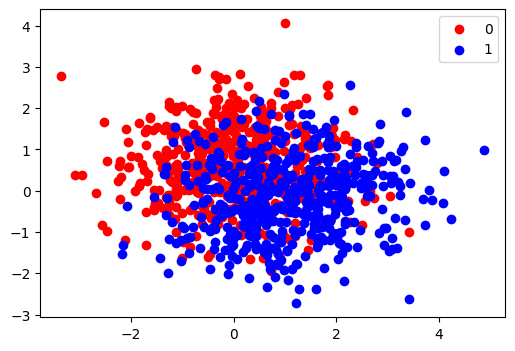

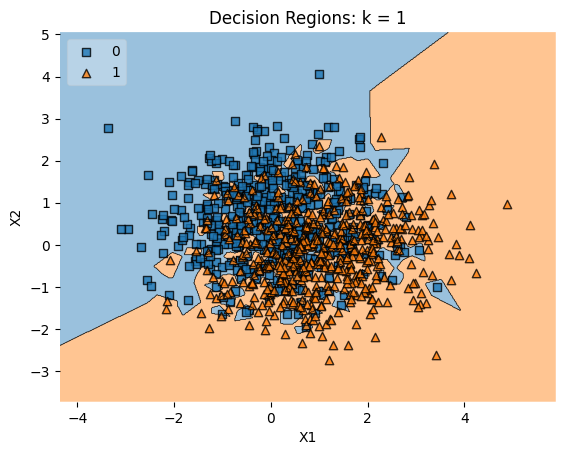

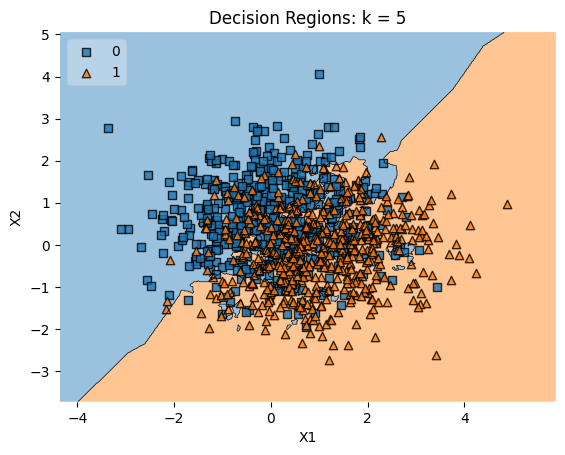

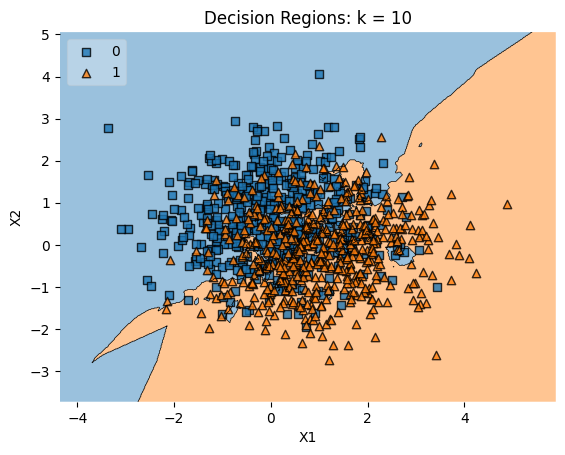

<Axes: >

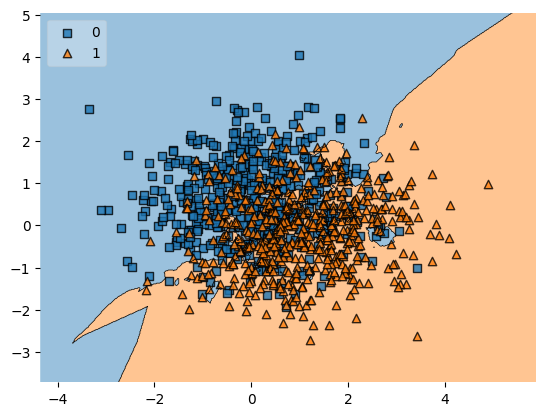

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(6,4))
n_samples = 1000
data = datasets.make_moons(n_samples=n_samples, noise=.9)
X = data[0]
y = data[1]

d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
plt.show()

vk = [1,5,10]
for k in vk:
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    plt.show()

log_reg = LogisticRegression()
log_reg.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)


#Questão 3

In [ ]:
X = df_iris.drop(columns = "species")
y = df_iris["species"]

model_lr_iris = LogisticRegression(max_iter=200)
cv = cross_validate(model_lr_iris, X, y, cv= 5)
print(f"Logistic Regression --> {cv['test_score'].mean()}")

for k in range(1, 15):
  model_knn_iris = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model_knn_iris.fit(X, y)

  cv = cross_validate(model_knn_iris, X, y, cv = 5)
  print(f"KNN com k = {k} -> {cv['test_score'].mean()}")


Logistic Regression --> 0.9733333333333334
KNN com k = 1 -> 0.96
KNN com k = 2 -> 0.9466666666666665
KNN com k = 3 -> 0.9666666666666668
KNN com k = 4 -> 0.9733333333333334
KNN com k = 5 -> 0.9733333333333334
KNN com k = 6 -> 0.9800000000000001
KNN com k = 7 -> 0.9800000000000001
KNN com k = 8 -> 0.9666666666666668
KNN com k = 9 -> 0.9733333333333334
KNN com k = 10 -> 0.9800000000000001
KNN com k = 11 -> 0.9800000000000001
KNN com k = 12 -> 0.9800000000000001
KNN com k = 13 -> 0.9733333333333334
KNN com k = 14 -> 0.9666666666666666


Percebe-se que os valores são bem próximos.

In [ ]:
X = df_vehicle.drop(columns = "Class")
y = df_vehicle["Class"]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)
model_vehicle = LogisticRegression(max_iter=200)

cv = cross_validate(model_vehicle, X, y, cv= 5)
print(f"Logistic Regression --> {cv['test_score'].mean()}")

for k in range(1, 15):
  model_knn_vehicle = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
  model_knn_vehicle.fit(X, y)

  cv = cross_validate(model_knn_vehicle, X, y, cv = 5)
  print(f"KNN com k = {k} -> {cv['test_score'].mean()}")


Logistic Regression --> 0.7872537417333797
KNN com k = 1 -> 0.693832231117299
KNN com k = 2 -> 0.6749321266968326
KNN com k = 3 -> 0.7127671423599026
KNN com k = 4 -> 0.6855621301775149
KNN com k = 5 -> 0.7151131221719457
KNN com k = 6 -> 0.7092168465019144
KNN com k = 7 -> 0.7163035154890359
KNN com k = 8 -> 0.6879081099895579
KNN com k = 9 -> 0.7068221371388792
KNN com k = 10 -> 0.7127323355377654
KNN com k = 11 -> 0.7032927253741733
KNN com k = 12 -> 0.7044691959624086
KNN com k = 13 -> 0.6961851722937695
KNN com k = 14 -> 0.686703793943613


Percebe-se que a regressão logística obtém resultados melhores.